In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['animation.html'] = 'html5'

# Problem 1
## Derive the modified equation for an FTCS scheme for the linear advection equation:

$$u_t = -cu_x $$

The numerical form of a this partial differential equation actually solves an equation of the form:

$$u_t = a_1u_x + a_2u_{xx} + a_3u_{xxx} + a_4u_{xxxx} + ... $$

where odd-ordered derivatives represent advection and dispersion terms, and even-ordered derivatives represent diffusion terms.

Re-writing the PDE in numerical form following an FTCS scheme:

$$\frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} \  +\  c\frac{u^{n}_{i+1}-u^{n}_{i-1}}{\Delta x} =0$$

Expanding the $u^{n+1}_i$ term as a Taylor series about time $n$:

$$u^{n+1}_{i}=u^{n}_{i}+\frac{1}{2!}\frac{\partial u^{n}_{i}}{\partial t} \Delta t+\frac{1}{3!}\frac{\partial^{2} u^{n}_{i}}{\partial t^{2}} \Delta t+...$$

which can be written in shorthand as:

$$u^{n+1}_{i}=u^{n}_{i}+\Delta tu^{n}_{it}+\frac{\Delta t^{2}}{2} u^{n}_{itt}+\frac{\Delta t^{3}}{3!} u^{n}_{ittt}+...$$

A brief note about this notation: The first index in the subscript indicates the velocity at point $i$, and is not a derivative. Similarly, we can expand the $u^{n}_{i\pm 1}$ term about $i$:

$$u^{n}_{i\pm 1}=u_{i}\pm \Delta xu^{n}_{ix}+\frac{\Delta x^{2}}{2} u^{n}_{ixx}\pm \frac{\Delta x^{3}}{3!} u^{n}_{ixxx}+...$$

Making the substitution into the numerical equation and rearranging gives:

$$u^{n}_{it}+cu^{n}_{ix}=-\frac{\Delta t}{2} u_{itt}-\frac{\Delta t^{2}}{3!} u_{ittt}+\frac{\Delta x^{2}}{3!} u^{n}_{ixxx}+...$$

We have recovered the original equation on the left. On the right, the spatial derivatives of even order did not survive the operation, but the odd-ordered ones, which had opposite signs, did. 

We now want the time derivatives in terms of space. We can differentiate the original equation in terms of time to obtain:

$$u_{tt}+cu_{xt}=u_{tt}+cu_{tx}=u_{tt}+c(-cu_{x})_{x}=u_{tt}-c^{2}u_{xx}=0$$

and therefore:

$$u_{tt} = c^2u_{xx}$$

Similarly, differentiating twice WRT time:

$$u_{ttt}+cu_{xtt}=u_{ttt}+cu_{ttx}=u_{ttt}+c(c^{2}u_{xx})_{x}=u_{ttt}+c^{3}u_{xxx}=0$$

and therefore:

$$u_{ttt} = -c^3u_{xxx}$$

Substituting gives:

$$u^{n}_{it}+cu^{n}_{ix}=-\frac{\Delta tc^{2}}{2} u_{ixx}+\left(\frac{\Delta t^{2}c^{3}}{3!} -\frac{c\Delta x^{2}}{3!} \right)u^{n}_{ixxx}+...$$

The first term on the right will always have a negative coefficient, since both $\Delta t$ and $c^2$ will always be positive. Therefore, negative diffusion will always exist and the scheme is unconditionally unstable.

## Conduct VonNeumann stability analysis for the FTCS scheme. Find the amplification factor and show that the scheme is unconditionally unstable.

Let the solution $u$ be 

$$u(x,t)\  =\  e^{qt}e^{ikx}$$

Therefore, the numerical advection equation is:

$$\frac{e^{q(t+\Delta t)}e^{ikx}-e^{qt}e^{ikx}}{\Delta t} +c\frac{e^{qt}e^{ik(x+\Delta x)}-e^{qt}e^{ik(x-\Delta x)}}{2\Delta x} =0$$



Dividing this equation by $e^{qt}e^{ikx}$ gives:

$$\frac{e^{q\Delta t}-1}{\Delta t} +c\frac{e^{ik\Delta x}-e^{-ik\Delta x}}{2\Delta x} =0$$

$$e^{q\Delta t}-1+\frac{c\Delta t}{2\Delta x} (e^{ik\Delta x}-e^{-ik\Delta x})=0$$

Using the identity:

$$e^{ik\Delta x}-e^{-ik\Delta x}=cos(k\Delta x)+isin(k\Delta x)-(cos(k\Delta x)-isin(k\Delta x))=2isin(k\Delta x)$$

we can rewrite the equation as:

$$e^{q\Delta t}-1+i\frac{c\Delta t}{\Delta x} sin(k\Delta x)=0$$

$$e^{q\Delta t}=1-i\frac{c\Delta t}{\Delta x}sin(k\Delta x) $$

The magnitude of the term on the right is:

$$\sqrt{1+\left( \frac{c\Delta t}{\Delta x} \right)^{2}  } $$

which is always greater than one, and therefore will contribute to positive growth, and instability.

Alternatively, the value of q can be found to be:


$$q\Delta t\  +\  ln\left( \frac{c\Delta t}{2\Delta x} \right)  +ln\left( \frac{e^{ik\Delta x}}{e^{-ik\Delta x}} \right)  =0 $$

$$q\Delta t\  +\  ln\left( \frac{c\Delta t}{2\Delta x} \right)  +2ik\Delta x=0$$

$$q\  =\  -\frac{1}{\Delta t} ln\left( \frac{c\Delta t}{2\Delta x} \right)  -i\frac{2k\Delta x}{\Delta t}  $$

The magnitude of which will is:

$$\sqrt{\left( \frac{1}{\Delta t} ln\left( \frac{c\Delta t}{2\Delta x} \right)  \right)^{2}  +\left( \frac{2k\Delta x}{\Delta t} \right)^{2}  } $$

This will also always be greater than 0, and so the exponential term will always grow.

## Use the amplification factor to derive the first two spatial derivative terms of the modified equation

In [42]:
from sympy import *
init_printing(use_latex=True)

Recall that the numerical scheme can be written as a series of spatial derivatives:

$$u_t = a_1u_x + a_2u_{xx} + a_3u_{xxx} + a_4u_{xxxx} + ... $$

Again, if we let the solution be $u(x,t) = e^{qt}e^{ikx}$, then our equation becomes:

$$qu\  =\  \sum^{}_{} a_{n}i^{n}k^{n}u$$

and therefore:

$$q\  =\  \sum^{}_{n} a_{n}i^{n}k^{n}$$

where, in general:

$$a_{n}=\frac{1}{i^{n}n!} \frac{\partial^{n} q}{\partial k^{n}} \big |_{k=0}$$

In [7]:
dt, dx, k, c, x, t= symbols('dt, dx, k, c, x, t', real=True)

In [13]:
q = 1/dt*ln(1-c*dt/2/dx*(exp(I*k*dx)-exp(-I*k*dx)))

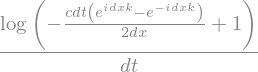

In [14]:
q

In [15]:
dqdx = q.diff(k)

In [16]:
dqdx.subs(k,0)

In [19]:
n = 1
a1 = 1/(I**n*factorial(n))*dqdx.subs(k,0)

In [20]:
a1

Here, we have exactly recovered the coefficient of the first spatial derivative. Moving on to the second derivative:

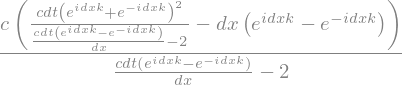

In [21]:
d2qdk = q.diff(k,2)
d2qdk

In [25]:
n = 2
a2 = 1/(I**n*factorial(n))*d2qdk.subs(k,0)

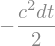

In [26]:
a2

We have also successfuly recovered the coefficient of the second spatial derivative.

# Problem 2
## The diffusion term in the previous problem causes instability. Propose a modification to the FTCS scheme to suppress the term.

One solution would be to solve a modified version of the equation where we add the unstable diffusion term, thereby canceling it out of the modified equation. The proposed equation is therefore:

$$\frac{u^{n+1}_i-u^n_i}{\Delta t} + c\frac{u^n_{i+1}-u^n_{i-1}}{2\Delta x}+\frac{c^2\Delta t}{2}\frac{u^n_{i+1}-2u^n_i+u^n_{i-1}}{\Delta x^2} = 0$$

To find the amplification factor, we first assume a solution of the form $u(x, t) = e^{qt}e^{ikx}$ and substitute it into the discretized equation to be solved.

$$\frac{e^{q(t+\Delta t)}e^{ikx}-e^{qt}e^{ikx}}{\Delta t} + c\frac{e^{qt}e^{ik(x+\Delta x)}-e^{qt}e^{ik(x-\Delta x)}}{2\Delta x} + \frac{e^{qt}e^{ik(x+\Delta x)}-2e^{qt}e^{ikx}+e^{qt}e^{ik(x-\Delta x)}}{\Delta x^2} = 0$$

Divide the entire equation by $e^{qt}e^{ikx}$:

$$\frac{e^{q\Delta t}-1}{\Delta t} + c\frac{e^{ik\Delta x}-e^{-ik\Delta x}}{2\Delta x} + \frac{c^2\Delta t}{2}\frac{e^{ik\Delta x}-2+e^{-ik\Delta x}}{\Delta x^2} = 0$$

We can then obtain the amplification factor as:

$$ q = \frac{1}{\Delta t} ln\left(1-\frac{c\Delta t}{2\Delta x}\left(e^{ik\Delta x}-e^{-ik\Delta x}\right) + \frac{c^2\Delta t^2}{2\Delta x^2}\left(e^{ik\Delta x}-2+e^{-ik\Delta x}\right)\right)$$

Recalling that a given coefficient of the modofied equation is related to the amplification factor as:

$$a_n = \frac{1}{i^nn!}\frac{\partial q}{\partial k}\bigg\rvert_{k=0}$$

we can, with the assistance of sympy, find the first three coefficients.

In [36]:
c, dt, dx, k = symbols('c, Delta_t, Delta_x, k', real=True)

In [37]:
q = 1/dt*log(1-c*dt/2/dx*(exp(I*k*dx)-exp(-I*k*dx)) + c**2*dt**2/2/dx**2*(exp(I*k*dx)-2+exp(-I*k*dx)))

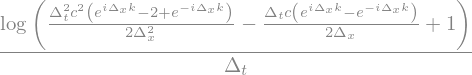

In [43]:
q

In [44]:
dqdk = q.diff(k)

In [45]:
n = 1
a1 = 1/(I**n*factorial(n))*dqdk.subs(k, 0)

In [46]:
a1

In [47]:
d2qdk = q.diff(k, 2)

In [48]:
n = 2
a2 = 1/(I**n*factorial(n))*d2qdk.subs(k, 0)

In [49]:
a2

In [50]:
d3qdk = q.diff(k, 3)

In [51]:
n = 3
a3 = 1/(I**n*factorial(n))*d3qdk.subs(k, 0)

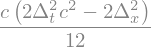

In [53]:
a3

Our scheme to eliminate the diffusion term from the modified equation has succeeded. The second coefficient, $a_2$, is zero. It will still have diffusion via the $a_3$ coefficient.

## Suggest a modification to address the dispersion. Show the modification in discretized form

As before, we will want to add a term that will cancel the dispersion term. In this case, that modification will include the $a_3$ coefficient in front of a third spatial derivative. Disregarding higher-order terms, we can use a third-difference sceme and have the discretized equation:

$$\frac{u^{n+1}_i-u^n_i}{\Delta t} + c\frac{u^n_{i+1}-u^n_{i-1}}{2\Delta x}+\frac{c^2\Delta t}{2}\frac{u^n_{i+1}-2u^n_i+u^n_{i-1}}{\Delta x^2} - \frac{c}{12} (2\Delta t^{2}c^{2}-2\Delta x^{2})\frac{u^{n}_{i+1}-2u^{n}_{i+1}+2u^{n}_{i-2}-u^{n}_{i-1}}{2\Delta x^{3}} = 0$$

which uses a second-order centered finite difference scheme for the third derivative.

# Problem 3
## 2D advection equation
For a scalar quantity $u(x,y,t)$, the 2D advection equation is:

$$u_t = -au_x - bu_y; \quad a,b > 0, \quad u(x,y,0)=u_0(x,y)$$

Show that $u(x,y,t) = u_0(x-at, y-bt)$ is an exact solution.

For $u(x,y,t)$, the chain rules states that:

$$\frac{\partial u}{\partial t} =\frac{\partial u}{\partial x} \frac{\partial x}{\partial t} +\frac{\partial u}{\partial y} \frac{\partial y}{\partial t} $$

We do not know what the function $u$ is, but we do know what the components of $y$ and $x$ are. Therefore, using the chain rule, we have:

$$\frac{\partial u}{\partial t} =-a\frac{\partial u}{\partial x} -b\frac{\partial u}{\partial y} $$

which is the equation in the problem statement.

## FTUS discretization

$$\frac{u^{n+1}_{ij} - u^n_{ij}}{\Delta t}+a\frac{u^n_{ij} - u^n_{i-1,j}}{\Delta x} + b\frac{u^n_{ij}-u^n_{i,j-1}}{\Delta y} = 0$$

## Finding the amplification factor

Let $u(x,y,t) = e^{qt}e^{ikx}e^{iky}$. Making this substitution, the equation becomes:

$$\frac{e^{q(t+\Delta t)}e^{ikx}e^{iky} - e^{qt}e^{ikx}e^{iky}}{\Delta t} + a\frac{e^{qt}e^{ikx}e^{iky} - e^{qt}e^{ik(x-\Delta x)}e^{iky}}{\Delta x} + b\frac{e^{qt}e^{ikx}e^{iky}-e^{qt}e^{ikx}e^{ik(y-\Delta y)}}{\Delta y} = 0$$

Dividing by $u(x,y,t)$ gives:

$$\frac{e^{q\Delta t}-1}{\Delta t} + \frac{a}{\Delta x}(1-e^{-ik\Delta x}) + \frac{b}{\Delta y}(1-e^{-ik\Delta y}) = 0$$

This gives an amplification factor of:

$$q = \frac{1}{\Delta t}ln\left(1-\frac{a\Delta t}{\Delta x}(1-e^{-ik\Delta x})-\frac{b\Delta t}{\Delta y}(1-e^{-ik\Delta y})\right)$$ 

To determine the stability condition, we must look at the coefficients per usual:

In [54]:
from sympy import *
init_printing(use_unicode=True)

In [55]:
k, a, b, dt, dx, dy, t, x, y = symbols('k, a, b, Delta_t Delta_x Delta_y t x y', real=True)

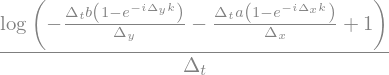

In [56]:
q = 1/dt*log(1-a*dt/dx*(1-exp(-I*k*dx))-b*dt/dy*(1-exp(-I*k*dy)))
q

In [57]:
dqdk = q.diff(k)

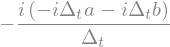

In [58]:
n = 1
a1 = dqdk.subs(k,0)/(I**n*factorial(n))
a1

In [59]:
d2qdk = q.diff(k, 2)

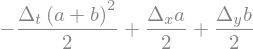

In [60]:
n = 2
a2 = d2qdk.subs(k,0)/(I**n*factorial(n))
a2

## Using the Taylor Series to derive the modified equation

The Taylor series for the time component is:

$$u^{n+1}_{ij} = u^n_{ij} + \Delta t u^n_{ijt} + \frac{\Delta t^2}{2!}u^n_{ijtt} + ...$$

For the x and y components:

$$u^n_{i-1,j} = u^n_{ij} -\Delta x u^n_{ijx} + \frac{\Delta x^2}{2!}u^n_{ijxx}+...$$

$$u^n_{i,j-1} = u^n_{ij} -\Delta y u^n_{ijy} + \frac{\Delta y^2}{2!}u^n_{ijyy}+...$$

The first term of the discrete equation becomes: 

$$u^n_{it} + \frac{\Delta t}{2}u^n_{itt} $$

The second term is:

$$au^n_{ijx} -a\frac{\Delta x}{2!}u^n_{ijxx}+...$$

The third term is:

$$bu^n_{ijy} -b\frac{\Delta y}{2!}u^n_{ijyy}+...$$

We would like to eliminate the second derivative with respect to time, so we differentiate the original equation, which is of the form:

$$u^n_{it} +au^n_x + bu^n_y=0$$

with respect to time to get:

$$u^n_{itt} + a\left(u^n_{xx}x_t\right) + b(u^n_{yy}y_t)=0$$

Here, we can solve for the second derivative term in time directly:

$$u^n_{tt} = a^2(u^n_{xx}) + b^2(u^n_{yy})$$

The unsimplified modified equation is:

$$u^n_t - au^n_x - bu^n_y = -\frac{\Delta t}{2}u^n_{itt} -a\frac{\Delta x}{2!}u^n_{ijxx} - b\frac{\Delta y}{2!}u^n_{ijyy}+...$$

Substituting for $u^n_{tt}$:

$$u^n_t - au^n_x - bu^n_y = -\frac{\Delta t}{2}(a^2(u^n_{xx}) + b^2(u^n_{yy})) -a\frac{\Delta x}{2!}u^n_{ijxx} - b\frac{\Delta y}{2!}u^n_{ijyy}+...$$

$$u^n_t - au^n_x - bu^n_y = -\frac{a^2\Delta t+a\Delta x}{2}u^n_{xx} - \frac{b^2\Delta t +b\Delta y}{2}u^n_{yy}+...$$

This recovers the same coefficients for the first and second deivatives that we found using the amplification factor.

The diffusion terms are negative as long as the coefficient numerators are positive. For the first term, this means:

$$a^2\Delta t + a \Delta x > 0$$
$$a\Delta t + \Delta x > 0$$
$$a>-\frac{\Delta x}{\Delta t}$$

But a is the advecting velocity, and therefore our condition is really:

$$2\frac{\Delta x}{\Delta t} > 0$$

Which is always true, and therefore negative diffusion exists.

Let's now factor a $\Delta t$ term out of the right-hand side terms, to get:

$$u^n_t - au^n_x - bu^n_y = -\Delta ta^2u^n_{xx} - \Delta tb^2u^n_{yy}+...$$

If we let $a = b = v$, we get a resultant vector whose components are $vsin(\theta)$ and $vcos(\theta)$.
$$u^n_t - v(u^n_xcos(\theta) + u^n_ysin(\theta)) = -\Delta tv^2(u^n_{xx}cos^2(\theta) + u^n_{yy}sin^2(\theta))+...$$
